<center>

# Test di primalità Miller-Rabin
## APA a.a. 22/23
### Enrico Pezzano (4825087) Eugenio Pallestrini (4878184)

</center>

<br>

**Compostezza o primalità?**

Il test di primalità di Miller-Rabin è un test probabilistico di tipo Monte Carlo, che può sbagliare se e solo se il numero in inpunt è composto e viene classificato come primo (vedremo che questo succederà con probabilità molto bassa, nell'ordine delle unità percentuali). In questo caso si dice che il test ha dato un falso positivo.
In un certo senso il Miller-Rabin_PrimalityTest è l'opposto del test di Fermat: un altro test probabilistico, ma di tipo Las Vegas ed in fin dei conti possiamo considerare il test di Miller-Rabin come un test di Fermat "potenziato".
Inoltre, siccome il test di Miller-Rabin è di tipo Monte Carlo, e siccome c'è il rischio del falso positivo, ma non del falso negativo, se il test dice che il numero è composto, allora è sicuramente composto: infatti si dice anche che il test Miller-Rabin sia in realtà un test di compostezza di $n$.

- Input: un numero intero positivo dispari e $\ge 3$
- Output: n "composto" o "probabilmente primo" (con probabilità di errore $\le 1/4$)

<!-- ![alt text](https://ibb.co/x3XXfbM) -->

### L'algoritmo di tipo MonteCarlo in pseudo-codice e':
```py
1. s = 0
2. q = n-1
3. while (q pari)
        s <- s+1
        q <- q/2
4. campiona a uniformemente a caso in {2,3,...,n-2} # n-2 è ovviamente un numero pari
5. calcola x = a^q mod n
6. if (x == 1 or x == n-1)
        return n "probabilmente primo"
7. while (s-1 > 0)
        x <- x^2 mod n
        if (x == -1 mod n)
            return n "probabilmente primo"
        s <- s-1
8. return n "composto"
```
### Adesso, dopo aver implementato alcuni metodi ausiliari, Miller-Rabin in python diventa:

In [57]:
%pip install numpy > /dev/null # redirect output to /dev/null to suppress output
%pip install matplotlib > /dev/null

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [58]:
def isPrime(n): # dumb brute force primality test
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

In [59]:
import random
import decimal
decimal.getcontext().prec = 1000

liars = []
witnesses = []

#Miller-Rabin primality test
def MCPrimalityTest(n):
    liars.clear()
    witnesses.clear()
    
    s = 0
    q = n - 1
    while q % 2 == 0:
        s += 1
        q = q/2

    # Perform the Monte Carlo protocol
    k = 20  # Number of iterations
    for _ in range(k):
        a = random.randint(2, n - 1) # random integer from 2 to n-2
        x = pow(decimal.Decimal(a), decimal.Decimal(q), decimal.Decimal(n))
        if x == 1 or x == -1: # Fermat's little theorem
            if(not isPrime(n)):
                liars.append(a)
            return True #probably prime
        while(s-1 >= 0):
            x = decimal.Decimal(x)**decimal.Decimal(2) % decimal.Decimal(n)
            if x == -1:
                if(not isPrime(n)):
                   liars.append(a)
                return True
            s -= 1

        witnesses.append(a)
        return False #composite

In [60]:
def gcd(a, b): # Calculate the greatest common divisor using Euclidean algorithm
    while b != 0:
        a, b = b, a % b
    return a

def calculate_order(n):
    order = 1
    for a in range(1, n):
        if gcd(a, n) == 1:
            result = pow(a, order, n)
            while result != 1:
                result = (result * a) % n
                order += 1
                if order > n:
                    return -1
    return order

### Adesso testiamo l'algoritmo (calcolando anche l'ordine di $Z^*$ di n)

In [61]:
# Testing the primary_test function
def main():
    n = [999, 997, 973, 561]
    
    for i in range(len(n)):
        print("\nTesto...", n[i])
        print("L'ordine di Z* di", n[i], "è:", calculate_order(n[i]))
        if MCPrimalityTest(n[i]):
            print(n[i], "probabilmente primo")
            print(n[i], "è davvero primo?", isPrime(n[i]))
            print(f"I bugiardi per {n[i]} sono {len(liars)} -> ", liars)
        else:
            print(n[i], "composto")
            print(f"I testimoni per {n[i]} sono {len(witnesses)} -> ", witnesses)
main()


Testo... 999
L'ordine di Z* di 999 è: 36
999 composto
I testimoni per 999 sono 1 ->  [793]

Testo... 997
L'ordine di Z* di 997 è: 996
997 probabilmente primo
997 è davvero primo? True
I bugiardi per 997 sono 0 ->  []

Testo... 973
L'ordine di Z* di 973 è: 138
973 composto
I testimoni per 973 sono 1 ->  [676]

Testo... 561
L'ordine di Z* di 561 è: 80
561 composto
I testimoni per 561 sono 1 ->  [378]


# Cosa succede se eseguiamo il test 100000 volte?
Cerchiamo eventuali bugiardi (che danno un falso positivo) e veri (che danno un falso negativo); in più verifichiamo che la frazione di testimoni è maggiore del $50$%.


 999  is probably prime  0  times out of 100000 runs, with probability of  0.0
I bugiardi per 999 sono 0 -> []
I testimoni per 999 sono 100000

 997  is probably prime  25296  times out of 100000 runs, with probability of  0.25296
I bugiardi per 997 sono 0 -> []
I testimoni per 997 sono 74704

 973  is probably prime  847  times out of 100000 runs, with probability of  0.00847
I bugiardi per 973 sono 8 -> [737, 513, 835, 235, 652, 876, 557, 459]
I testimoni per 973 sono 99153

 561  is probably prime  736  times out of 100000 runs, with probability of  0.00736
I bugiardi per 561 sono 4 -> [256, 460, 103, 511]
I testimoni per 561 sono 99264


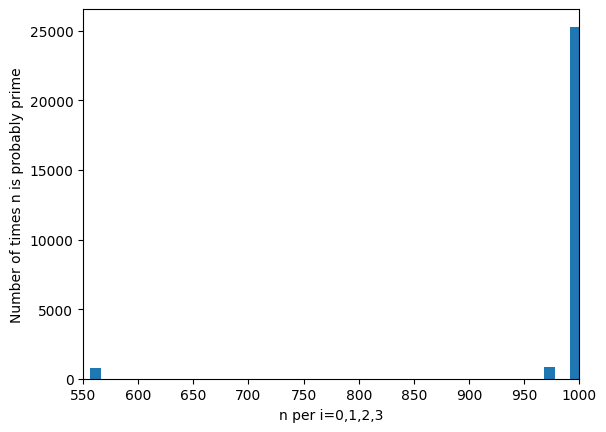

In [62]:
import matplotlib.pyplot as plt

def plotResults():
    global liars
    global witnesses
    bugiardi = [[],[],[],[]]
    count_witnesses = [0,0,0,0]

    n = [999, 997, 973, 561]
    results = [0,0,0, 0]
    run = 100000

    for r in range(run):
        for i in range(len(n)):
            if MCPrimalityTest(n[i]): # if probably prime
                results[i] += 1 # count the number of times n[i] is probably prime
                if len(liars) > 0:
                    bugiardi[i].append(liars[-1]) # append only the last liar every time
                # else:
                    # bugiardi[i] = None
            else: # if composite
                count_witnesses[i] += 1 # count the number of witnesses per n[i]

    for i in range(len(n)):
        bugiardi[i] = list(set(bugiardi[i])) # remove duplicates for each n[i]
    
    for i in range(len(n)):
        print("\n", n[i], " is probably prime ", results[i], " times out of", r+1, "runs, with probability of ", results[i]/(r+1))
        print(f"I bugiardi per {n[i]} sono {len(bugiardi[i]) if bugiardi[i]!=None else '0'} ->", bugiardi[i])
        print(f"I testimoni per {n[i]} sono {count_witnesses[i]}")
    
    plt.bar([n[0],n[1],n[2],n[3]], results, width=10)
    plt.xlabel('n per i=0,1,2,3')
    plt.ylabel('Number of times n is probably prime')
    plt.xlim(550, 1000)
    plt.show()
                
plotResults()

# Conclusioni
- Nel caso di $999$ (n1) l'algoritmo ha funzionato come previsto, infatti $999$ è composto e il test ha dato "composto" con certezza assoluta (0 volte su 100000 esecuzioni).
- Nel caso di $997$ (n2) l'algoritmo ha funzionato come previsto, infatti $997$ è primo e il test ha dato "probabilmente primo" con una probabilità del $25$ % (notiamo che se cambiamo l'ordine di grandezza delle $run$, la percentuale non cambia).
- Nel caso di $973$ (n3) l'algoritmo ha funzionato come previsto, infatti $973$ è composto e il test ha dato "composto" quasi con certezza assoluta con probabilità $>99$ % (come si può osservare dal grafico).
- Nel caso di $561$ (n4) l'algoritmo ha funzionato come previsto, infatti $561$ è composto e il test ha dato "composto" quasi con certezza assoluta con probabilità $>99$ % (come si può osservare dal grafico).

Osserviamo che $561$ è un numero di Carmichael (il primo per la precisione), ovvero un numero composto che soddisfa la congruenza di Fermat per ogni $a$ coprimo con $561$ (ovvero $a^{561-1} \equiv 1 \mod 561$). Per molti anni si è pensato che i numeri di Carmichael fossero rari, ma nel 1994 Alford, Granville e Pomerance hanno dimostrato che i numeri di Carmichael sono comunque rari, ma infiniti. Inoltre, per molti test di primalità, i numeri di Carmichael sono i peggiori casi possibili o comunque difficili da gestire; questo non accade per MCPrimalityTest, che è un test di compostezza e non di primalità.

Infine constatiamo che la frazione dei testimoni è sempre maggiore del $50$ %, come richiesto dal compito; infatti è sempre intorno al $75$ % (notiamo di nuovo che se cambiamo l'ordine di grandezza delle $run$, la percentuale non cambia).

